<a href="https://colab.research.google.com/github/poojan14/AML-Practicals/blob/master/Practical_4SVM_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kernel** methods map the data into higher dimensional spaces in the hope that in this higher-dimensional space the data could become more easily separated or better structured



In [3]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


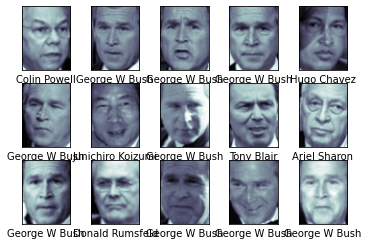

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

**RBF kernel**:
It is a general-purpose kernel; used when there is no prior knowledge about the data.



In [0]:
from sklearn.svm import SVC

from sklearn.decomposition import PCA as RandomizedPCA

from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [7]:

from sklearn.model_selection import learning_curve,GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 8s, sys: 16.5 s, total: 1min 25s
Wall time: 52.4 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [0]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

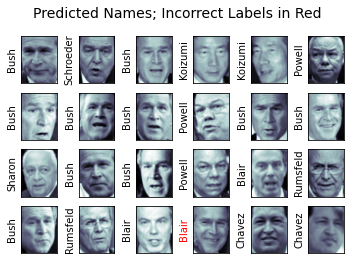

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [10]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


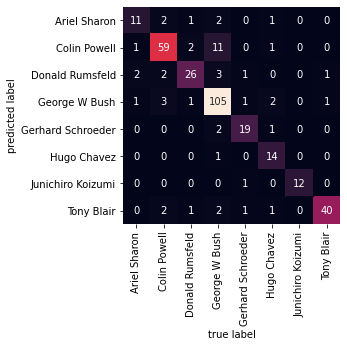

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Sigmoid kernel:** 

This kernel uses tanh function. This can be used as a proxy for a neural network. Application of this kernel is Image Classification.



In [0]:
from sklearn.svm import SVC

from sklearn.decomposition import PCA as RandomizedPCA

from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='sigmoid', class_weight='balanced')
model = make_pipeline(pca, svc)

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [15]:

from sklearn.model_selection import learning_curve,GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 6s, sys: 16.3 s, total: 1min 22s
Wall time: 49.7 s
{'svc__C': 50, 'svc__gamma': 0.0001}


In [0]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

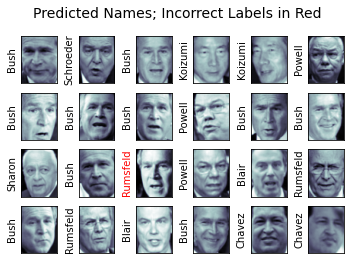

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [18]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.63      0.80      0.71        15
     Colin Powell       0.86      0.90      0.88        68
  Donald Rumsfeld       0.72      0.84      0.78        31
    George W Bush       0.96      0.81      0.88       126
Gerhard Schroeder       0.66      0.83      0.73        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.75      1.00      0.86        12
       Tony Blair       0.89      0.93      0.91        42

         accuracy                           0.85       337
        macro avg       0.79      0.85      0.81       337
     weighted avg       0.86      0.85      0.85       337



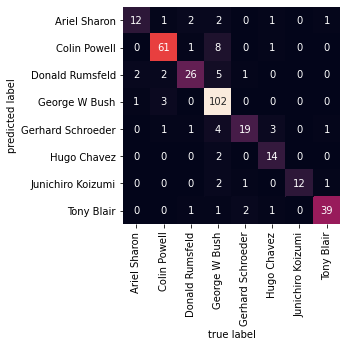

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
from sklearn.svm import SVC

from sklearn.decomposition import PCA as RandomizedPCA

from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='poly', class_weight='balanced')
model = make_pipeline(pca, svc)

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [25]:

from sklearn.model_selection import learning_curve,GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 9s, sys: 16.3 s, total: 1min 26s
Wall time: 53.6 s
{'svc__C': 50, 'svc__gamma': 0.005}


In [0]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

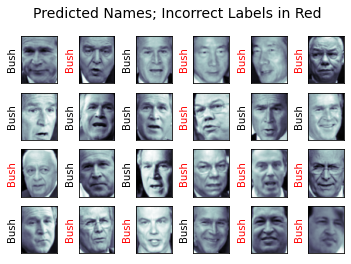

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.13      0.24        15
     Colin Powell       1.00      0.16      0.28        68
  Donald Rumsfeld       0.00      0.00      0.00        31
    George W Bush       0.40      0.99      0.57       126
Gerhard Schroeder       0.50      0.04      0.08        23
      Hugo Chavez       0.00      0.00      0.00        20
Junichiro Koizumi       1.00      0.33      0.50        12
       Tony Blair       1.00      0.10      0.17        42

         accuracy                           0.44       337
        macro avg       0.61      0.22      0.23       337
     weighted avg       0.59      0.44      0.32       337



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


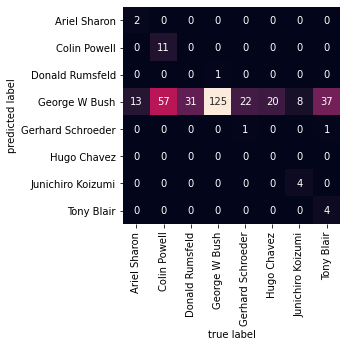

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Comparison of RBF,SIGMOID,POLYNOMIAL kernels:**

RBF: Precision-0.86 Recall-0.85 F1 score-0.85

Sigmoid: Precision-0.86 Recall-0.85 F1 score-0.85

Polynomial: Precision-0.59 Recall-0.44 F1 score-0.32

  Easily RBF and Sigmoid outperformed Polynomial Kernel which had poor results.
  
  In RBF 1 incorrect prediction Bush as Blair.

  In Sigmoid 1 incorrect prediction Bush as Rumsfeld.

  In Polynomial plenty incorrect prediction as it predicted all images as Bush.